<a href="https://colab.research.google.com/github/udoyroy98/Motor_Fault_Detection_ML/blob/main/RF_fold_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as snNew
import pandas as pdNew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as pltNew

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/0-5train.csv')

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,9]

In [ ]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setting up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [10, 75, 150],
    'max_depth': [None, 15, 30],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Grid search with cross-validation
clf = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=25, cv=5, scoring='accuracy',n_jobs=-1)
clf.fit(X_train, y_train)

print(f"Best parameters: {clf.best_params_}")

# Predict using the best model
y_pred = clf.best_estimator_.predict(X_test)



Best parameters: {'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1_score =  f1_score(y_test, y_pred, average='macro')


print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Accuracy: 0.9992
Recall: 0.9992
Precision: 0.9992
F1-Score: 0.9992


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25035
           1       1.00      1.00      1.00     25074
           2       1.00      1.00      1.00     24894

    accuracy                           1.00     75003
   macro avg       1.00      1.00      1.00     75003
weighted avg       1.00      1.00      1.00     75003



In [ ]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[25033,     0,     2],
       [    0, 25042,    32],
       [    0,    28, 24866]])

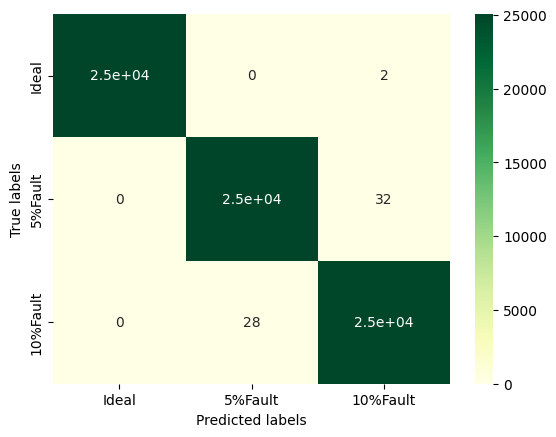

In [ ]:
ax= plt.subplot()
confusion_matrix = pdNew.DataFrame(c_mat, range(3), range(3))
snNew.heatmap(confusion_matrix, annot=True ,cmap="YlGn", ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.xaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']); ax.yaxis.set_ticklabels(['Ideal', '5%Fault','10%Fault']);
pltNew.show()